In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
#loading the dataset
HP_train = pd.read_csv('train.csv')
HP_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [13]:
#dimension of the dataset
HP_train.shape

(1168, 81)

In [16]:
#All columns of the dataset
HP_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
#checking the datatypes 
HP_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [15]:
#checking the information oof the dataset
HP_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [10]:
#checking for the null values in the dataset
HP_train[HP_train.columns[HP_train.isnull().any()]].isnull().sum()

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

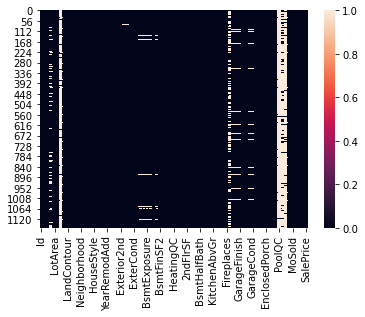

In [18]:
sns.heatmap(HP_train.isnull())

In [22]:
#statistical summary
HP_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
# Let's fill the missing values in categorical columns as NA

columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
HP_train[columns] = HP_train[columns].fillna('NA')

# Let's fill the missing values in MasVnrType with None

HP_train['MasVnrType'] = HP_train['MasVnrType'].fillna('None')

# Let's fill the missing values in GarageYrBlt with 0

HP_train['GarageYrBlt'] = HP_train['GarageYrBlt'].fillna('0')

# Let's Imputing the missing values and replace it with the median

HP_train['LotFrontage'].fillna(HP_train['LotFrontage'].median(),inplace=True)
HP_train['MasVnrArea'].fillna(HP_train['MasVnrArea'].median(),inplace=True)

In [24]:
#Correlation 
HP_corr = HP_train.corr()
HP_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.006165,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.061397,0.003868,...,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.336234,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.028215,-0.052236,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.006165,-0.336234,1.000000,0.296790,0.229981,-0.047851,0.112000,0.089513,0.188273,0.227732,...,0.087267,0.151044,0.021103,0.050499,0.030440,0.195973,-0.002830,0.022579,-0.004162,0.323851
LotArea,-0.029212,-0.124151,0.296790,1.000000,0.107188,0.017513,0.005506,0.027228,0.120192,0.221851,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.229981,0.107188,1.000000,-0.083167,0.575800,0.555945,0.403985,0.219643,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.047851,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.135133,-0.028810,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.112000,0.005506,0.575800,-0.377731,1.000000,0.592829,0.318562,0.227933,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.089513,0.027228,0.555945,0.080669,0.592829,1.000000,0.178583,0.114430,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.061397,0.028215,0.188273,0.120192,0.403985,-0.135133,0.318562,0.178583,1.000000,0.263377,...,0.152083,0.127876,-0.102142,0.019123,0.047375,0.013836,-0.027263,0.012707,-0.013220,0.460535
BsmtFinSF1,0.003868,-0.052236,0.227732,0.221851,0.219643,-0.028810,0.227933,0.114430,0.263377,1.000000,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874


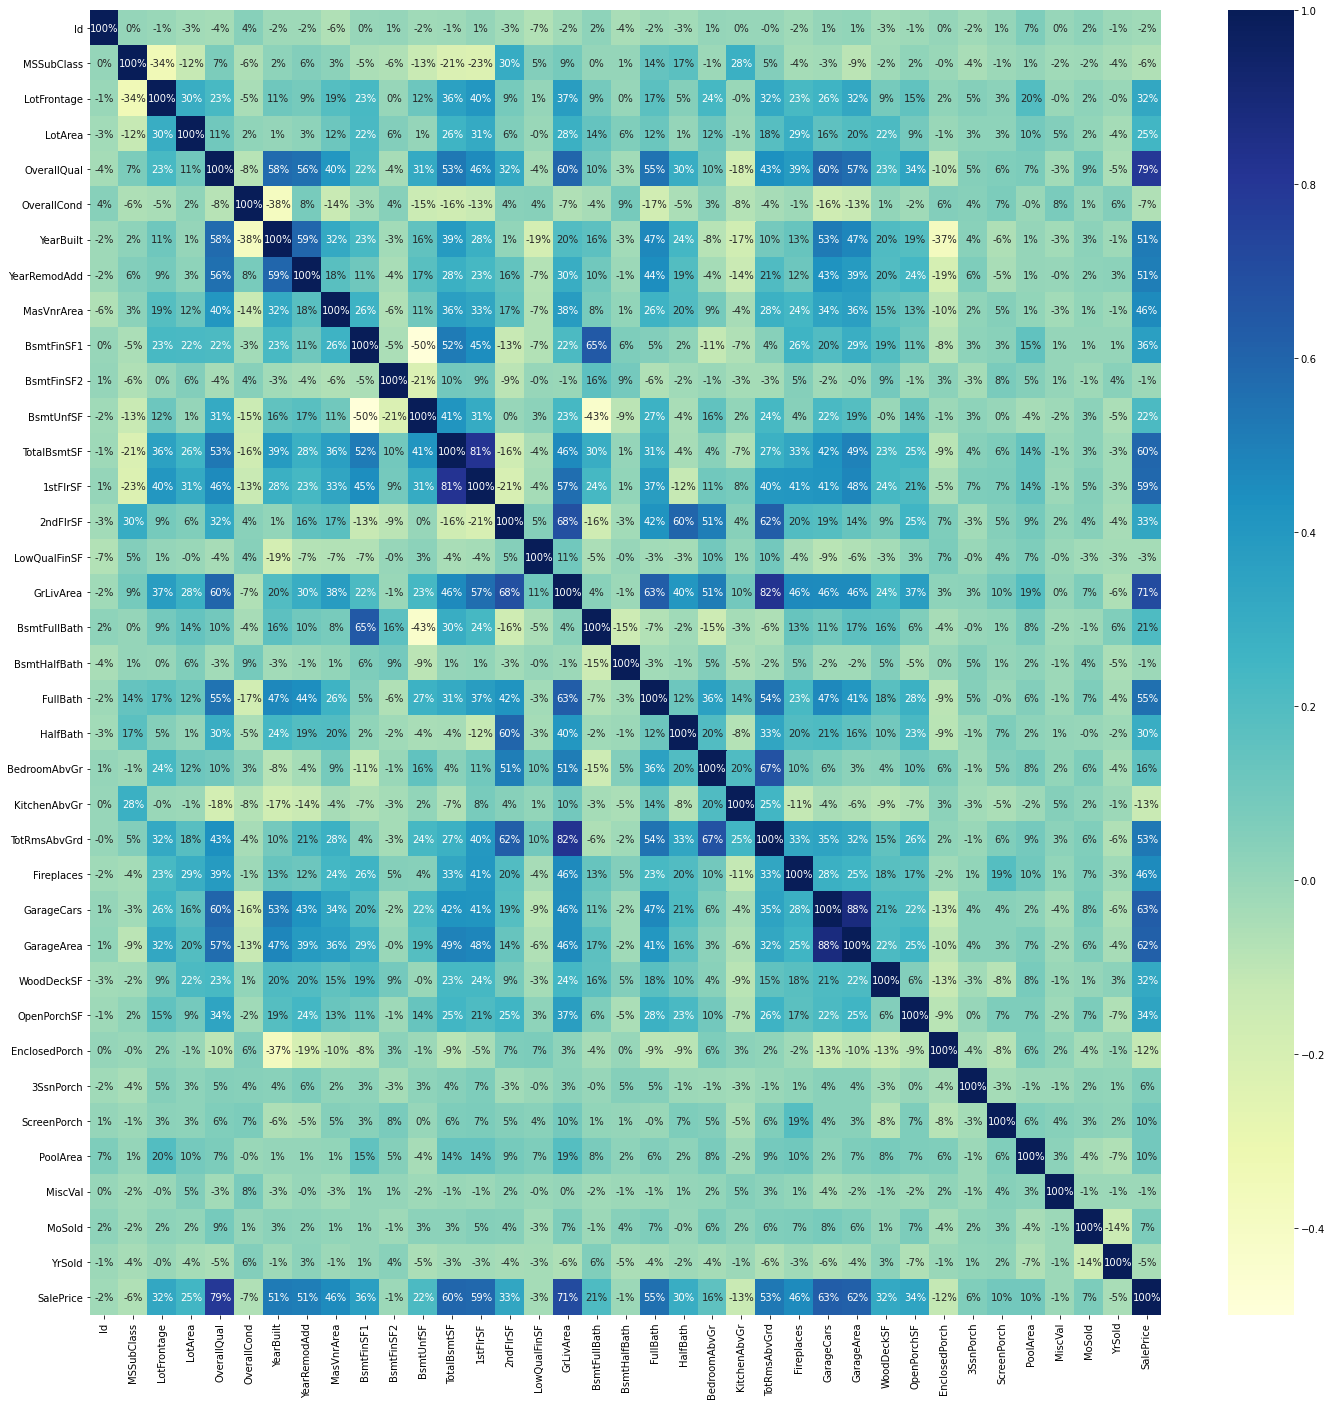

In [25]:
# Visualize correlation using heat map
plt.figure(figsize=(24,24))
sns.heatmap(HP_corr,annot=True,fmt='.0%',cmap='YlGnBu')
plt.show()

Text(0.5, 1.0, 'Correlation of Features with target(SalePrice)')

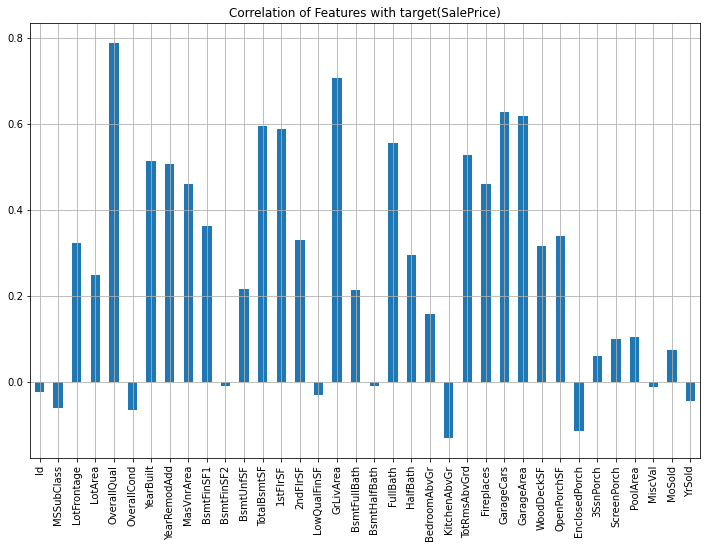

In [26]:
#Correlation of features with target 'SalePrice'
plt.figure(figsize=(12,8))
HP_train.drop('SalePrice', axis=1).corrwith(HP_train['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation of Features with target(SalePrice)")

###### DATA VISUALIZATION

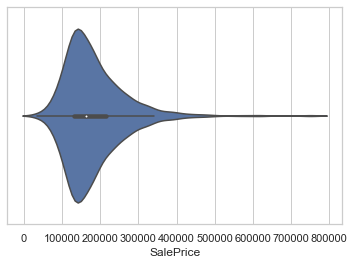

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64

In [31]:
# Let's Check the target variable
sns.violinplot(HP_train['SalePrice'])
plt.show()

HP_train['SalePrice'].value_counts()

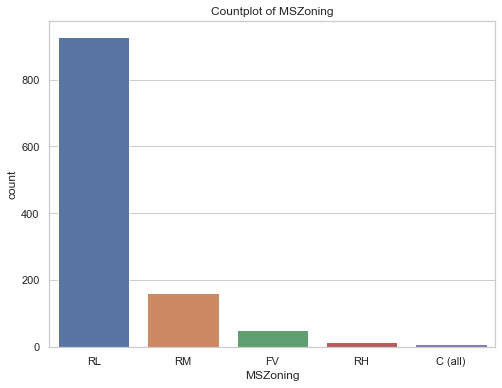

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [32]:
# Let's check the column MsZoning

plt.subplots(figsize=(8,6))
sns.countplot(x="MSZoning", data=HP_train)
plt.title("Countplot of MSZoning")
plt.xlabel('MSZoning')
plt.ylabel("count")
plt.show()

HP_train['MSZoning'].value_counts()

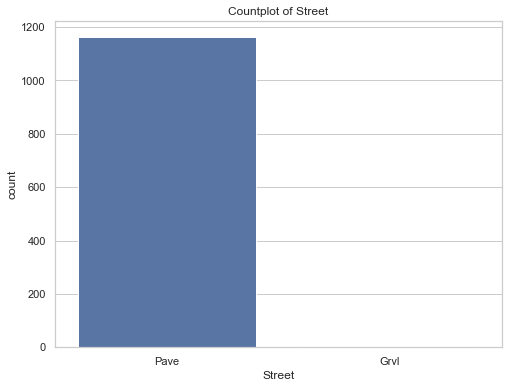

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [33]:
# Let's check the column Street

plt.subplots(figsize=(8,6))
sns.countplot(x="Street", data=HP_train)
plt.title("Countplot of Street")
plt.xlabel('Street')
plt.ylabel("count")
plt.show()

HP_train['Street'].value_counts()

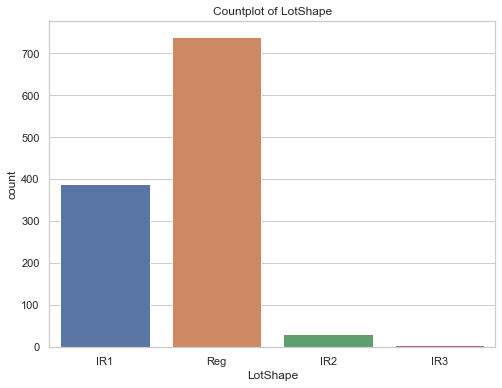

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [34]:
# Let's check the column LotShape

plt.subplots(figsize=(8,6))
sns.countplot(x="LotShape", data=HP_train)
plt.title("Countplot of LotShape")
plt.xlabel('LotShape')
plt.ylabel("count")
plt.show()

HP_train['LotShape'].value_counts()

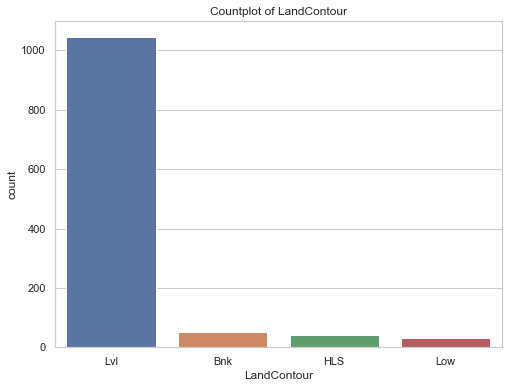

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [35]:
# Let's check the column LandContour

plt.subplots(figsize=(8,6))
sns.countplot(x="LandContour", data=HP_train)
plt.title("Countplot of LandContour")
plt.xlabel('LandContour')
plt.ylabel("count")
plt.show()

HP_train['LandContour'].value_counts()

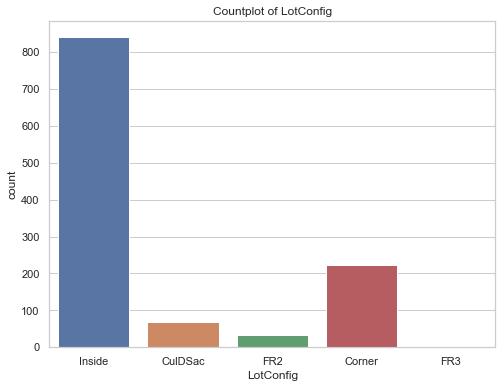

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [36]:
# Let's check the column LotConfig

plt.subplots(figsize=(8,6))
sns.countplot(x="LotConfig", data=HP_train)
plt.title("Countplot of LotConfig")
plt.xlabel('LotConfig')
plt.ylabel("count")
plt.show()

HP_train['LotConfig'].value_counts()

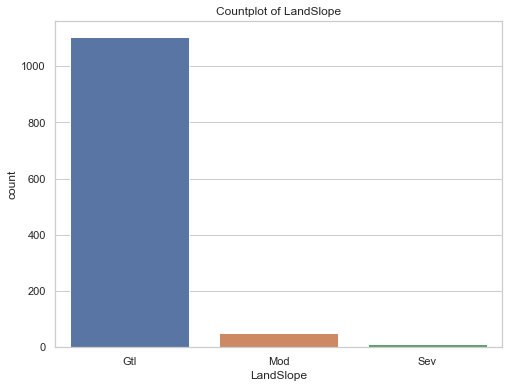

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [37]:
# Let's check the column LandSlope

plt.subplots(figsize=(8,6))
sns.countplot(x="LandSlope", data=HP_train)
plt.title("Countplot of LandSlope")
plt.xlabel('LandSlope')
plt.ylabel("count")
plt.show()

HP_train['LandSlope'].value_counts()

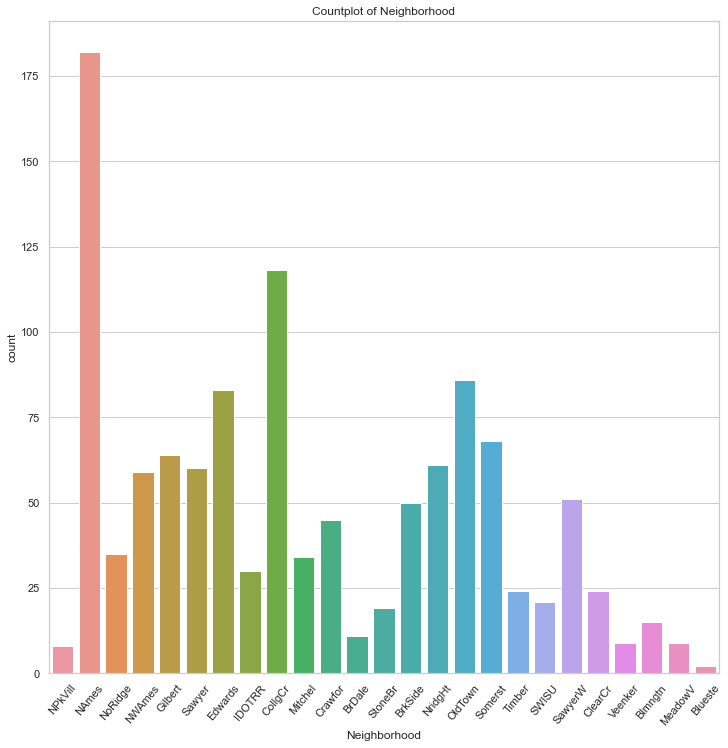

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [38]:
# Let's check the column Neighbourhood

plt.subplots(figsize=(12,12))
sns.countplot(x="Neighborhood", data=HP_train)
plt.title("Countplot of Neighbourhood")
plt.xticks(rotation=50)
plt.xlabel('Neighborhood')
plt.ylabel("count")
plt.show()

HP_train['Neighborhood'].value_counts()

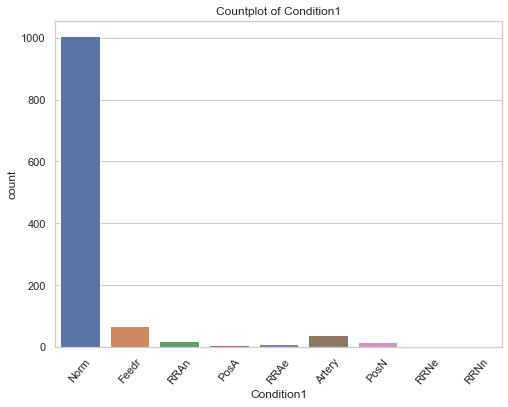

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [39]:
# Let's check the column Condition1

plt.subplots(figsize=(8,6))
sns.countplot(x="Condition1", data=HP_train)
plt.title("Countplot of Condition1")
plt.xticks(rotation=50)
plt.xlabel('Condition1')
plt.ylabel("count")
plt.show()

HP_train['Condition1'].value_counts()

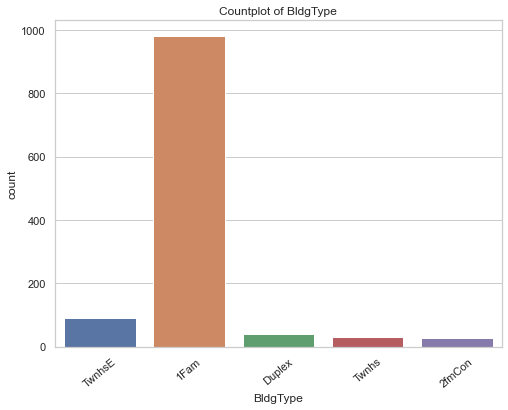

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [40]:
# Let's check the column BldgType

plt.subplots(figsize=(8,6))
sns.countplot(x="BldgType", data=HP_train)
plt.title("Countplot of BldgType")
plt.xticks(rotation=40)
plt.xlabel('BldgType')
plt.ylabel("count")
plt.show()

HP_train['BldgType'].value_counts()

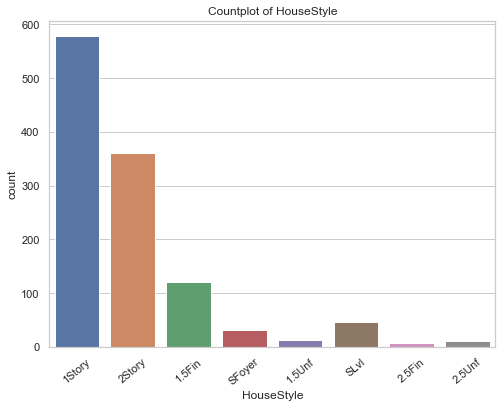

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [41]:
# Let's check the column HouseStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="HouseStyle", data=HP_train)
plt.title("Countplot of HouseStyle")
plt.xticks(rotation=40)
plt.xlabel('HouseStyle')
plt.ylabel("count")
plt.show()

HP_train['HouseStyle'].value_counts()

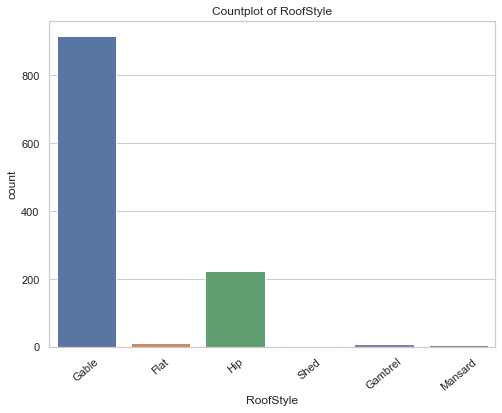

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [42]:
# Let's check the column RoofStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="RoofStyle", data=HP_train)
plt.title("Countplot of RoofStyle")
plt.xticks(rotation=40)
plt.xlabel('RoofStyle')
plt.ylabel("count")
plt.show()

HP_train['RoofStyle'].value_counts()

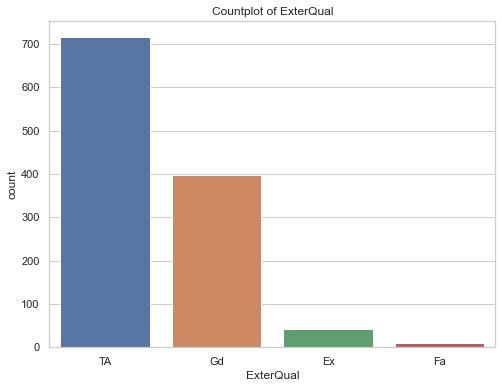

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

In [43]:
# Let's check the column ExterQual

plt.subplots(figsize=(8,6))
sns.countplot(x="ExterQual", data=HP_train)
plt.title("Countplot of ExterQual")
plt.xlabel('ExterQual')
plt.ylabel("count")
plt.show()

HP_train['ExterQual'].value_counts()

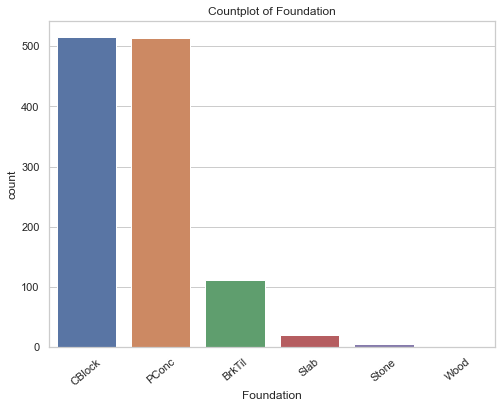

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [44]:
# Let's checking the column Foundation

plt.subplots(figsize=(8,6))
sns.countplot(x="Foundation", data=HP_train)
plt.title("Countplot of Foundation")
plt.xticks(rotation=40)
plt.xlabel('Foundation')
plt.ylabel("count")
plt.show()

HP_train['Foundation'].value_counts()

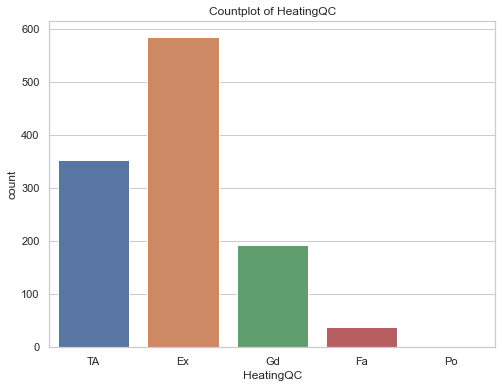

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [45]:
# Let's check the column HeatingQC

plt.subplots(figsize=(8,6))
sns.countplot(x="HeatingQC", data=HP_train)
plt.title("Countplot of HeatingQC")
plt.xlabel('HeatingQC')
plt.ylabel("count")
plt.show()

HP_train['HeatingQC'].value_counts()

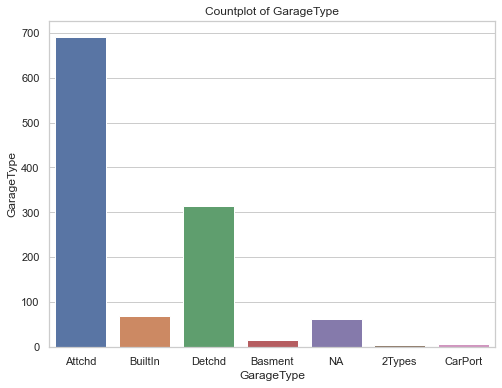

Attchd     691
Detchd     314
BuiltIn     70
NA          64
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [46]:
# Let's check the column GarageType

plt.subplots(figsize=(8,6))
sns.countplot(x="GarageType", data=HP_train)
plt.title("Countplot of GarageType")
plt.xlabel('GarageType')
plt.ylabel("GarageType")
plt.show()

HP_train['GarageType'].value_counts()

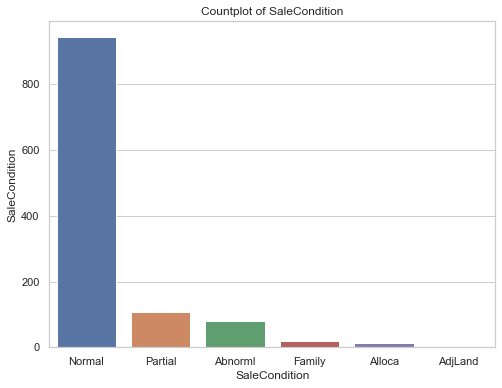

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [47]:
# Let's check the column SaleCondition

plt.subplots(figsize=(8,6))
sns.countplot(x="SaleCondition", data=HP_train)
plt.title("Countplot of SaleCondition")
plt.xlabel('SaleCondition')
plt.ylabel("SaleCondition")
plt.show()

HP_train['SaleCondition'].value_counts()

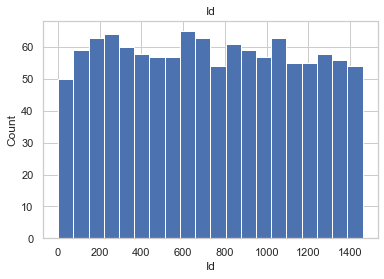

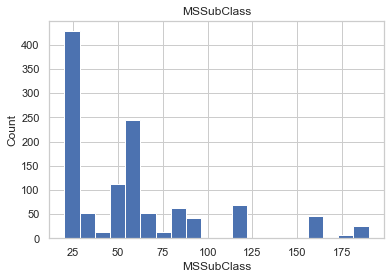

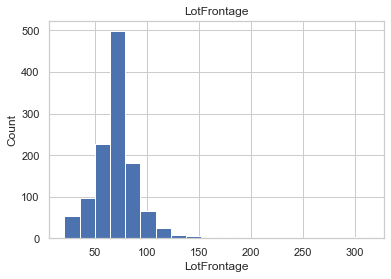

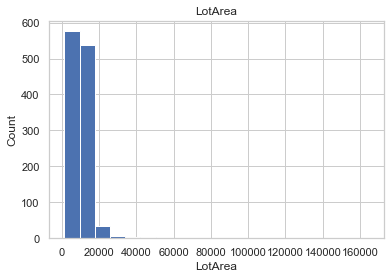

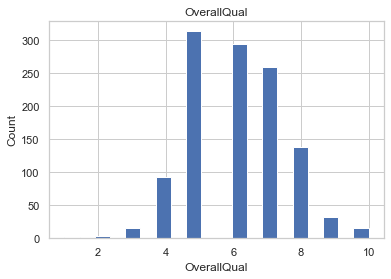

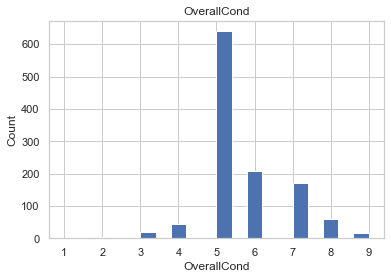

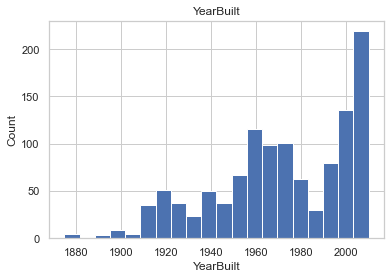

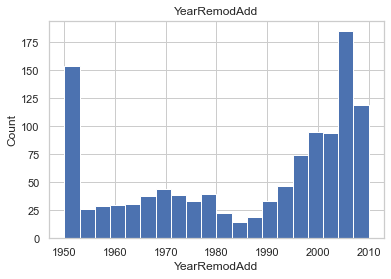

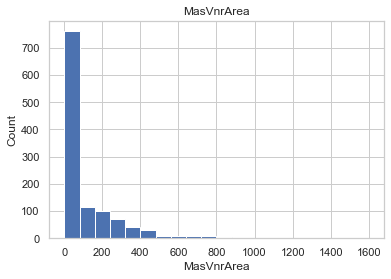

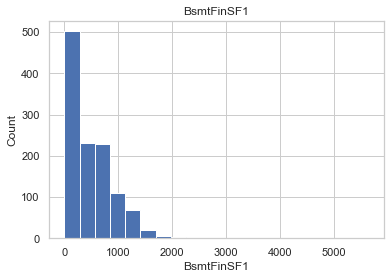

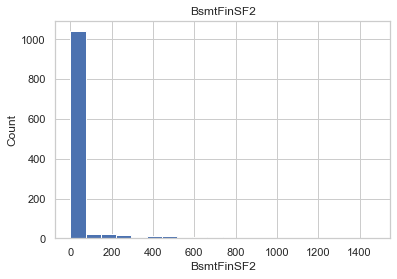

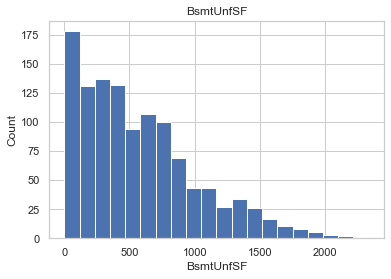

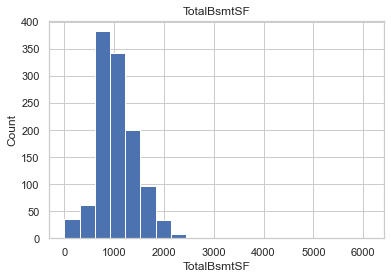

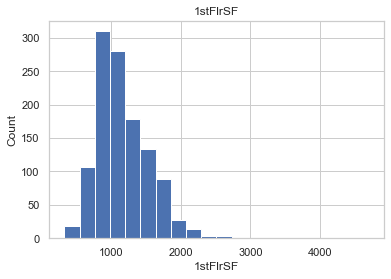

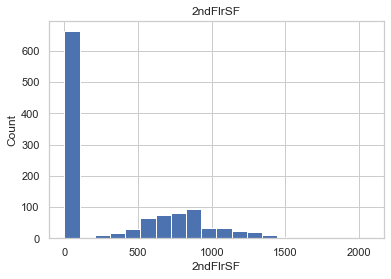

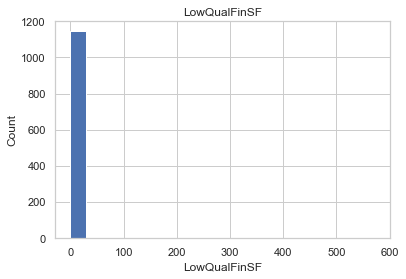

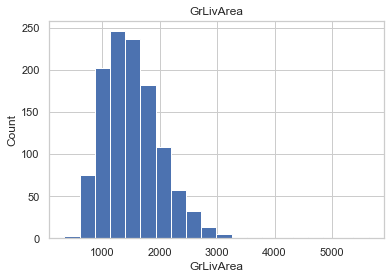

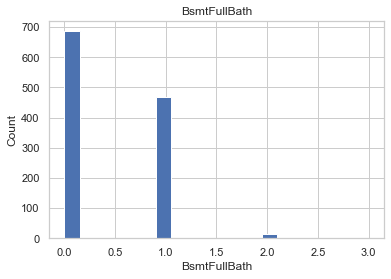

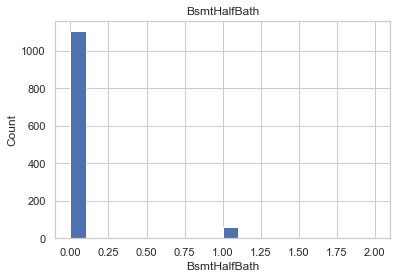

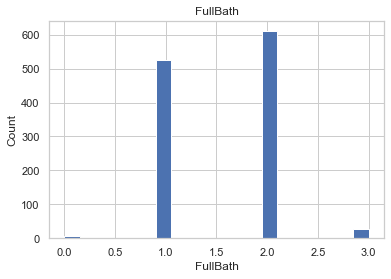

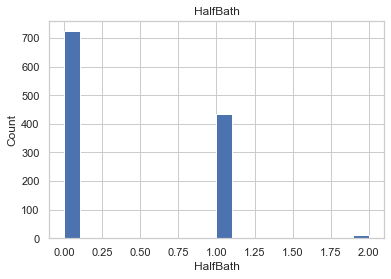

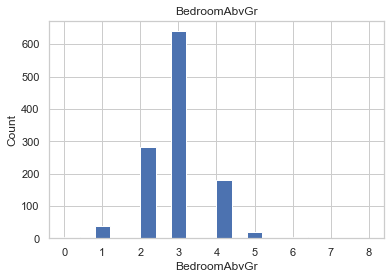

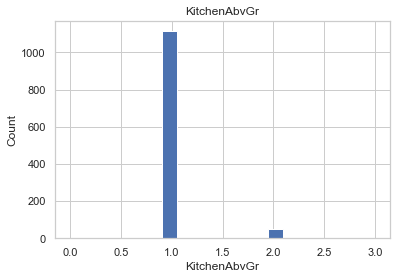

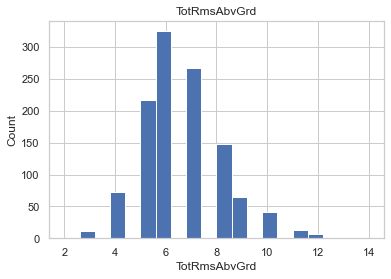

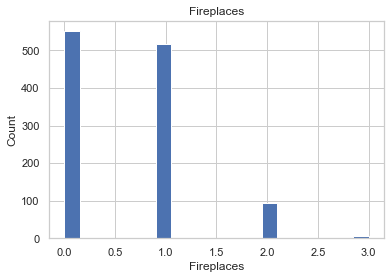

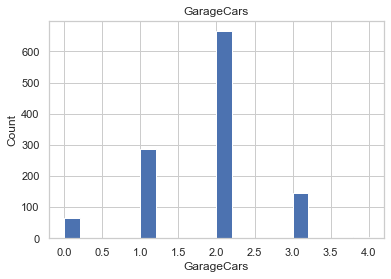

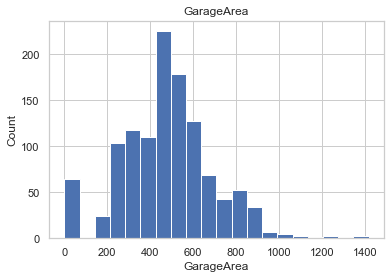

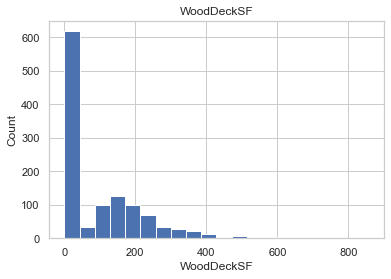

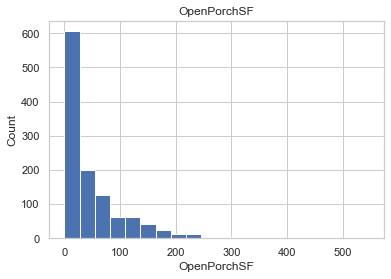

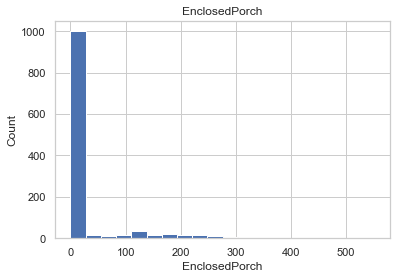

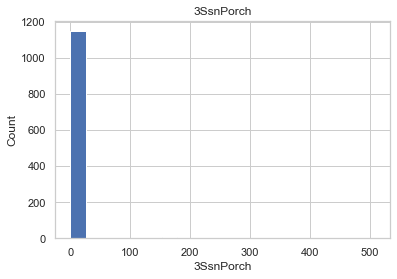

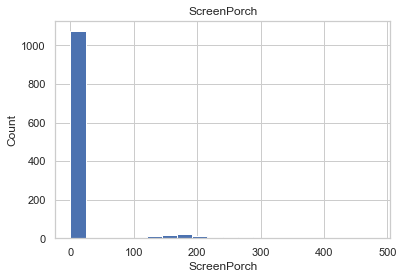

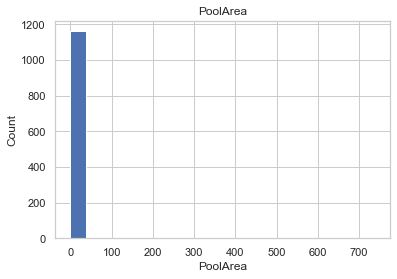

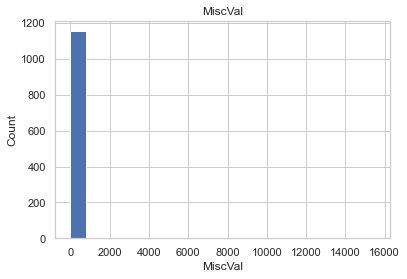

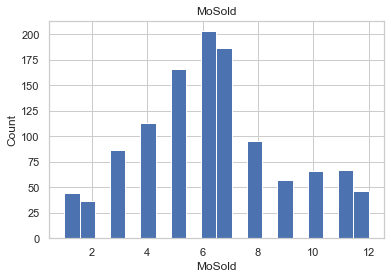

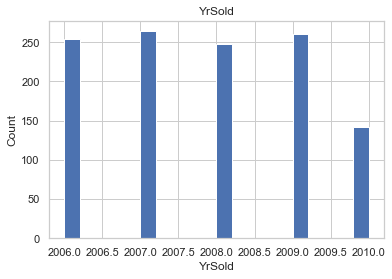

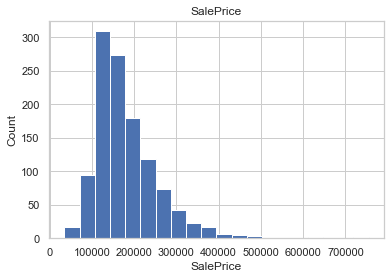

In [49]:
# Let's plot the histogram of every numerical column

for col in HP_train.describe().columns:
    data=HP_train.copy()
    data[col].hist(bins=20)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

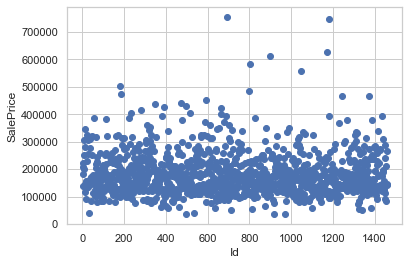

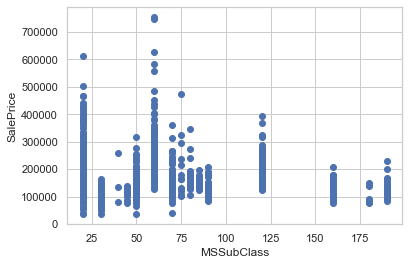

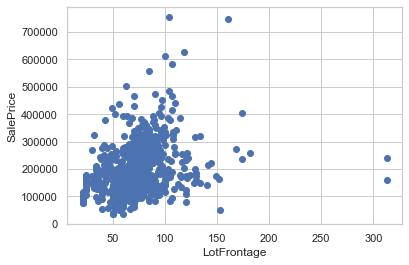

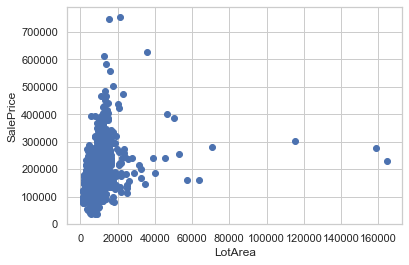

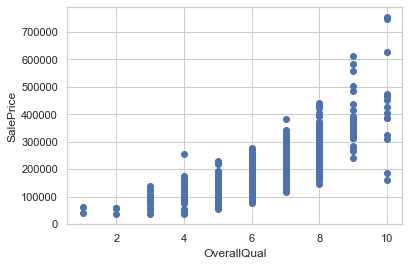

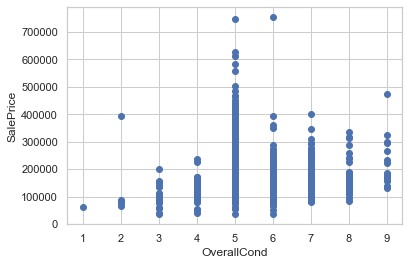

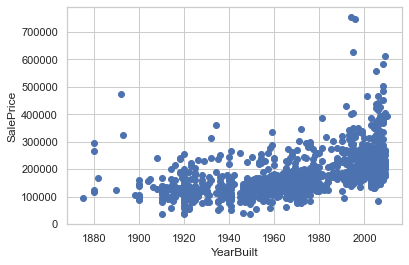

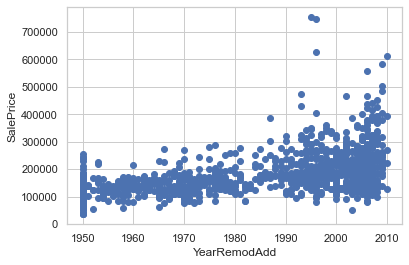

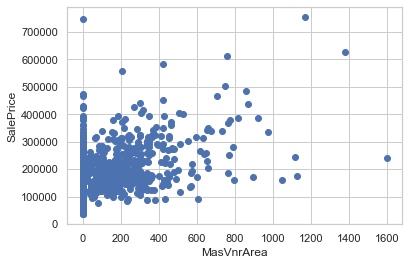

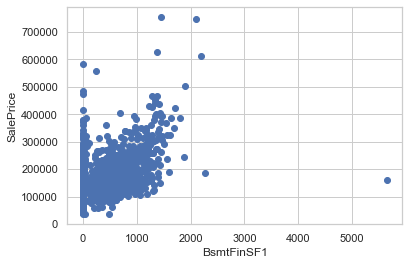

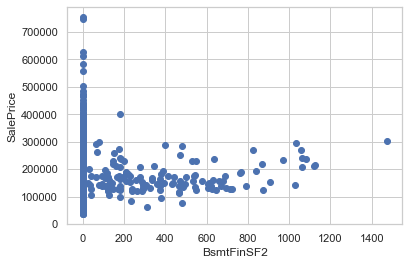

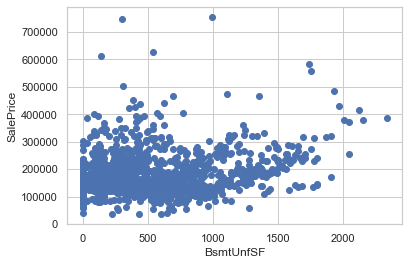

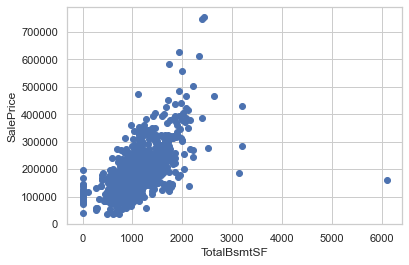

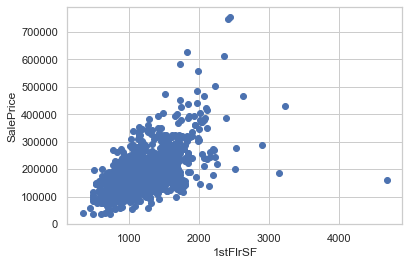

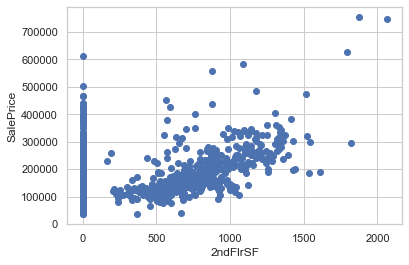

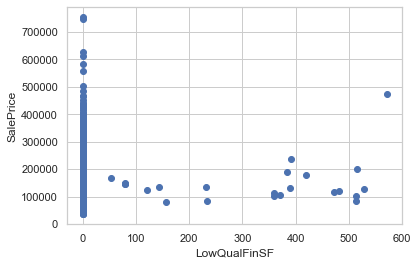

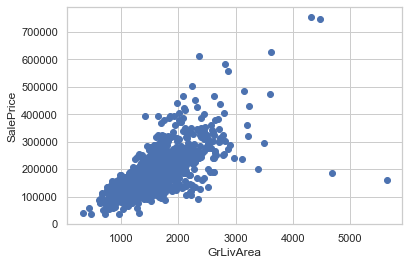

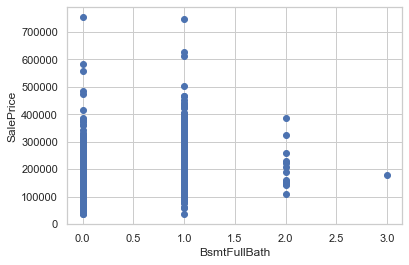

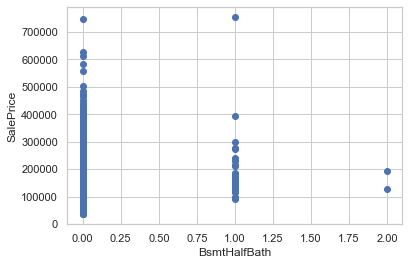

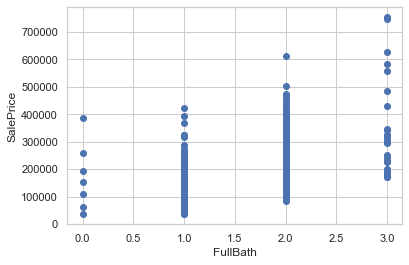

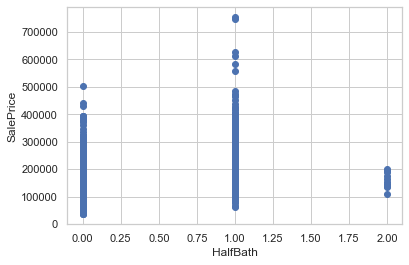

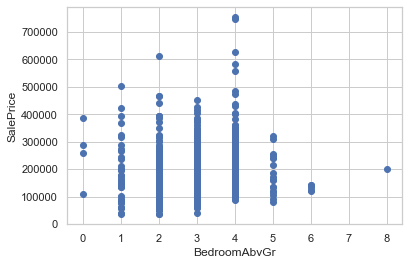

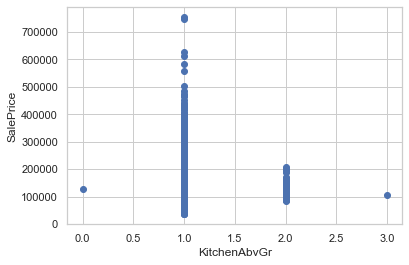

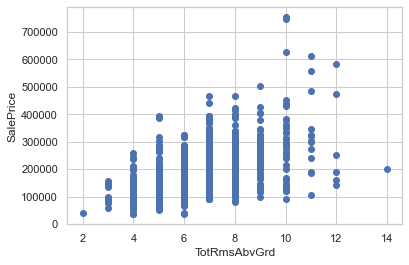

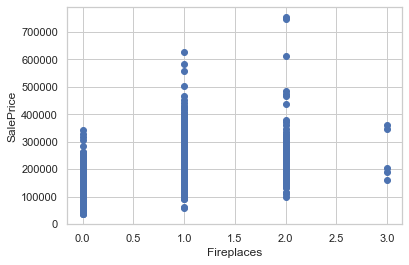

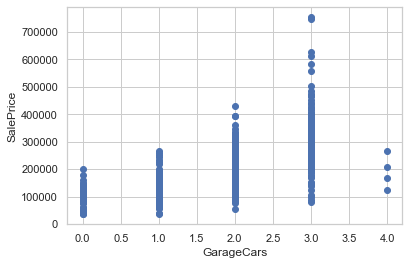

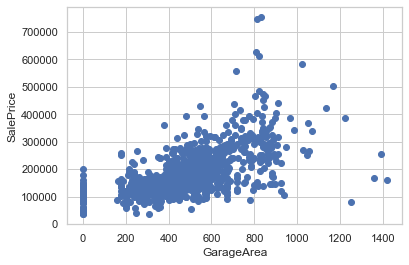

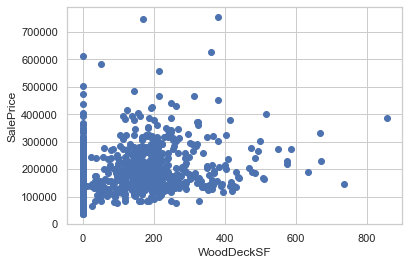

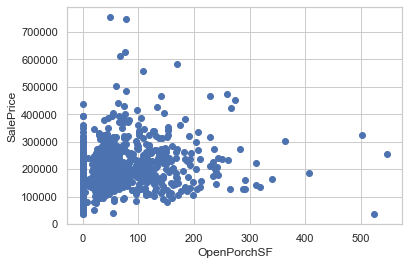

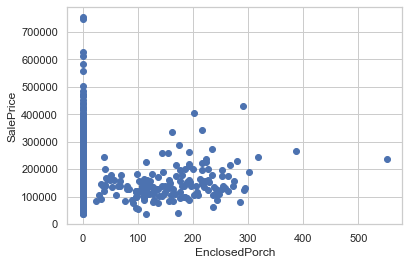

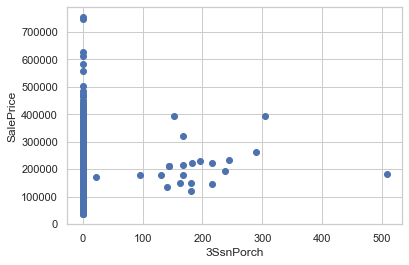

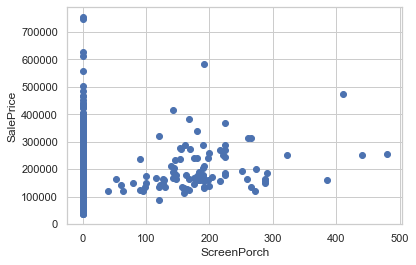

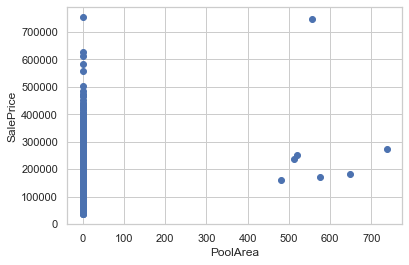

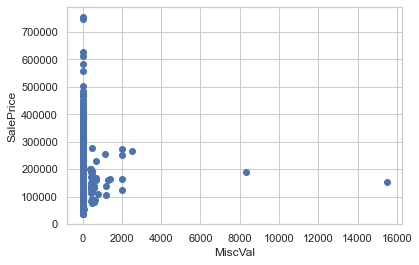

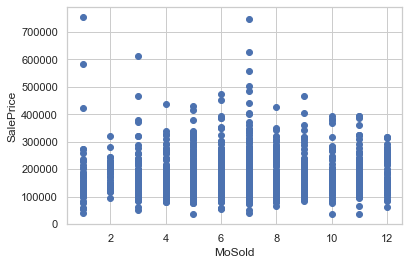

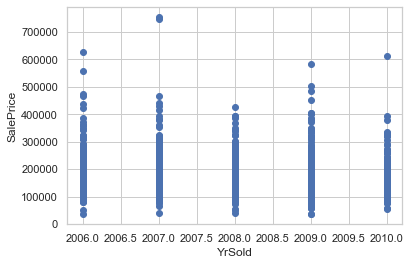

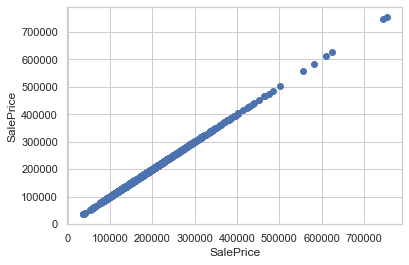

In [50]:
# Let's plot the Scatter plot between all feature variables and target variable

for col in HP_train.describe().columns:
    data=HP_train.copy()
    plt.scatter(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()


<Figure size 576x432 with 0 Axes>

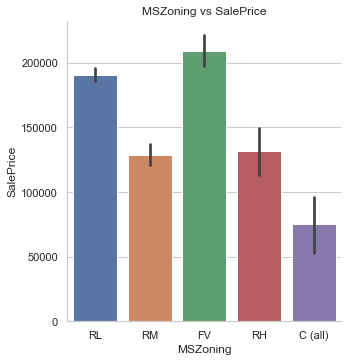

In [56]:
# Let's plot the Factor plot of MSZoning vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='MSZoning',y='SalePrice',data=HP_train,kind='bar')
plt.title('MSZoning vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

<Figure size 576x432 with 0 Axes>

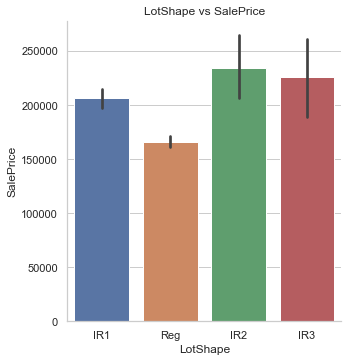

In [57]:
# Let's plot the Factor plot of LotShape vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotShape',y='SalePrice',data=HP_train,kind='bar')
plt.title('LotShape vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

<Figure size 576x432 with 0 Axes>

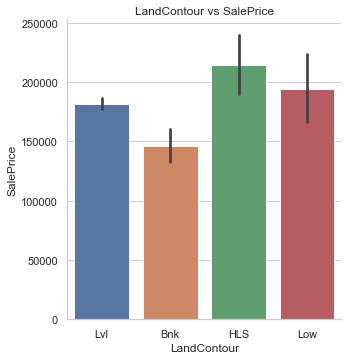

In [58]:
# Let's plot the Factor plot of LandContour vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LandContour',y='SalePrice',data=HP_train,kind='bar')
plt.title('LandContour vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

<Figure size 576x432 with 0 Axes>

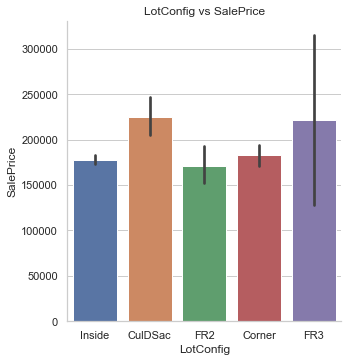

In [60]:
# Let's plot the Factor plot of LotConfig vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotConfig',y='SalePrice',data=HP_train,kind='bar')
plt.title('LotConfig vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

<Figure size 1152x1152 with 0 Axes>

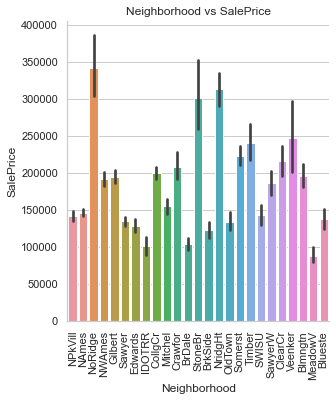

In [62]:
# Let's plo the Factor plot of Neighborhood vs SalePrice

plt.figure(figsize=(16,16))
sns.factorplot(x='Neighborhood',y='SalePrice',data=HP_train,kind='bar')
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation='vertical')
plt.ylabel('SalePrice')
plt.show()

<Figure size 576x432 with 0 Axes>

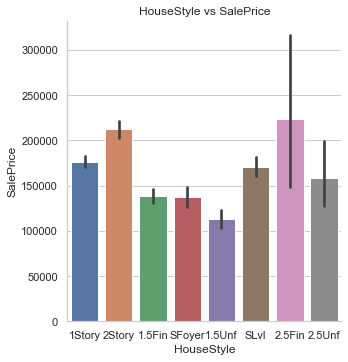

In [63]:
# Let's plot the Factor plot of HouseStyle vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='HouseStyle',y='SalePrice',data=HP_train,kind='bar')
plt.title('HouseStyle vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

<Figure size 576x432 with 0 Axes>

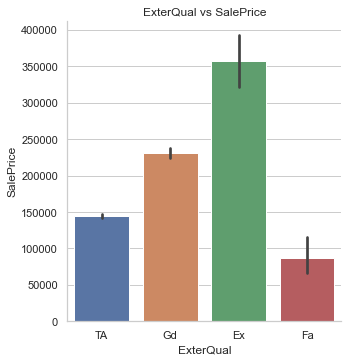

In [64]:
# Let's plot the Factor plot of ExterQual vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='ExterQual',y='SalePrice',data=HP_train,kind='bar')
plt.title('ExterQual vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

<Figure size 576x432 with 0 Axes>

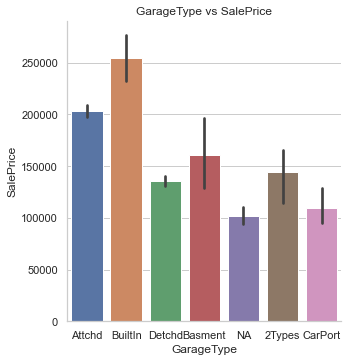

In [65]:
# Let's plot the Factor plot of GarageType vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='GarageType',y='SalePrice',data=HP_train,kind='bar')
plt.title('GarageType vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

<Figure size 576x432 with 0 Axes>

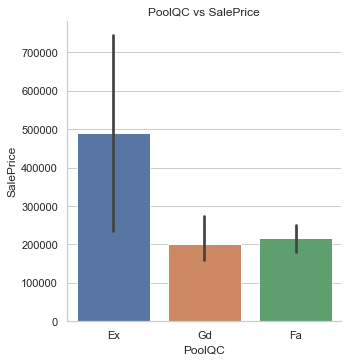

In [66]:
# Let's plot the Factor plot of PoolQC vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='PoolQC',y='SalePrice',data=HP_train,kind='bar')
plt.title('PoolQC vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

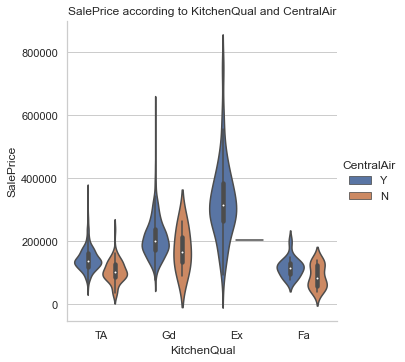

In [67]:
# Let's plot the GarageType and GarageCond with respect to SalePrice plot

sns.factorplot(x='KitchenQual',y='SalePrice',hue='CentralAir',data=HP_train,kind='violin')
plt.title('SalePrice according to KitchenQual and CentralAir')
plt.xticks()
plt.ylabel('SalePrice')
plt.show()

###### PRE-PROCESSING

In [68]:
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                    'PavedDrive', 'SaleType', 'SaleCondition'] 

HP_train = pd.get_dummies(HP_train, columns = categorical_cols, drop_first=True)
HP_train

,Id,MSSubClass,LotFrontage,LotArea,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,127,120,70.0,4928,NaN,AllPub,6,5,1976,1976,...,0,0,0,0,1,0,0,0,1,0
1,889,20,95.0,15865,NaN,AllPub,8,6,1970,1970,...,0,0,0,0,1,0,0,0,1,0
2,793,60,92.0,9920,NaN,AllPub,7,5,1996,1997,...,0,0,0,0,1,0,0,0,1,0
3,110,20,105.0,11751,NaN,AllPub,6,6,1977,1977,...,0,0,0,0,0,0,0,0,1,0
4,422,20,70.0,16635,NaN,AllPub,6,7,1977,2000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,70.0,9819,NaN,AllPub,5,5,1967,1967,...,0,0,0,0,1,0,0,0,1,0
1164,554,20,67.0,8777,NaN,AllPub,4,5,1949,2003,...,0,0,0,0,1,0,0,0,1,0
1165,196,160,24.0,2280,NaN,AllPub,6,6,1976,1976,...,0,0,0,0,1,0,0,0,1,0
1166,31,70,50.0,8500,Pave,AllPub,4,4,1920,1950,...,0,0,0,0,1,0,0,0,1,0


In [69]:
# Let's drop unnecessary columns

HP_train.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence",],axis=1,inplace=True)
HP_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,70.0,4928,6,5,1976,1976,0.0,120,0,...,0,0,0,0,1,0,0,0,1,0
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,...,0,0,0,0,1,0,0,0,1,0
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,...,0,0,0,0,1,0,0,0,1,0
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,...,0,0,0,0,0,0,0,0,1,0
4,20,70.0,16635,6,7,1977,2000,126.0,1246,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,70.0,9819,5,5,1967,1967,31.0,450,0,...,0,0,0,0,1,0,0,0,1,0
1164,20,67.0,8777,4,5,1949,2003,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1165,160,24.0,2280,6,6,1976,1976,0.0,566,0,...,0,0,0,0,1,0,0,0,1,0
1166,70,50.0,8500,4,4,1920,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [70]:
# Let's make a copy of our dataset

HP_train_copy = HP_train.copy()

In [74]:
from scipy import stats

def percentile_capping(HP_train, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=HP_train[col], limits=(from_low_end, from_high_end), inplace=True)

In [75]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
          'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
          'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
          'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [76]:
percentile_capping(HP_train, features, 0.01, 0.10)

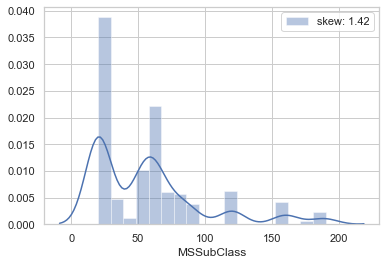

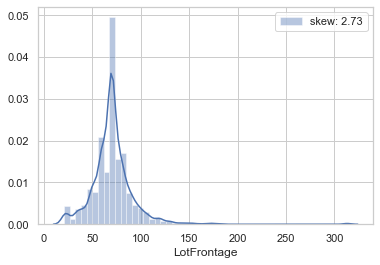

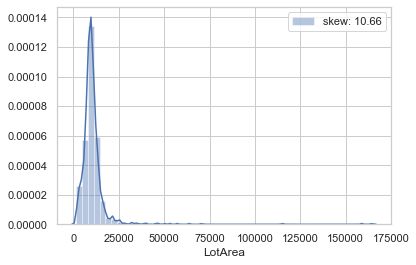

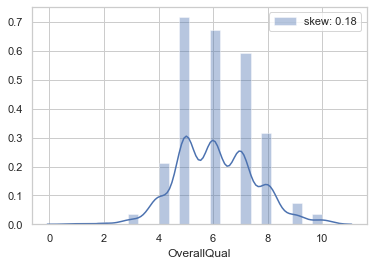

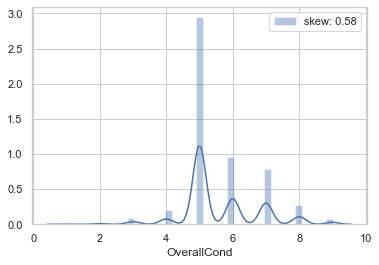

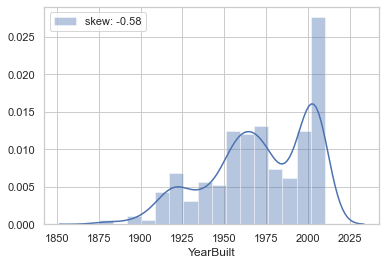

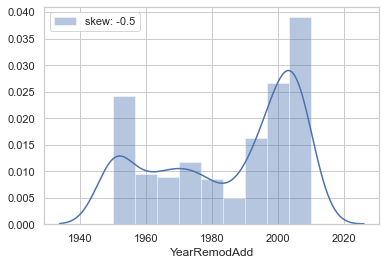

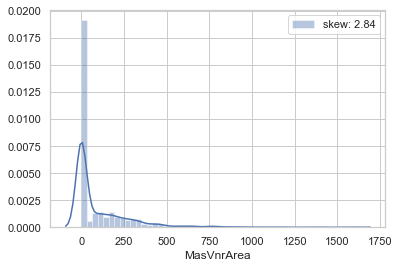

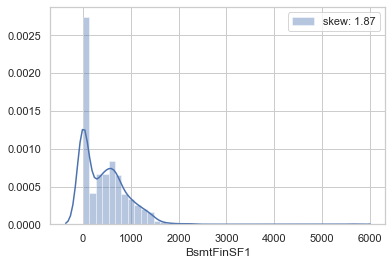

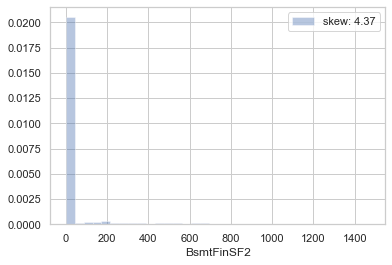

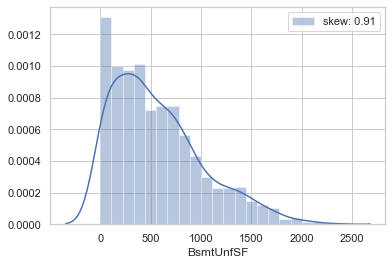

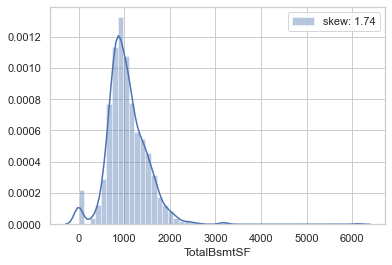

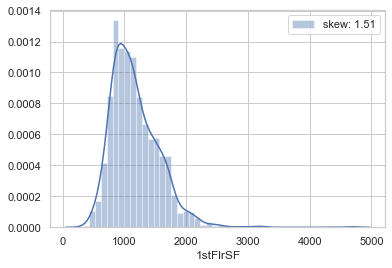

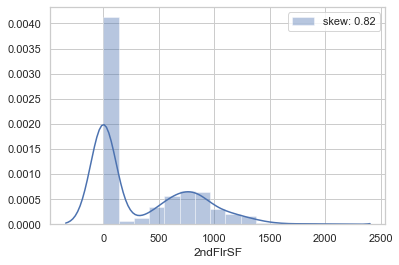

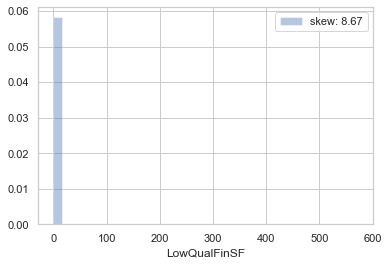

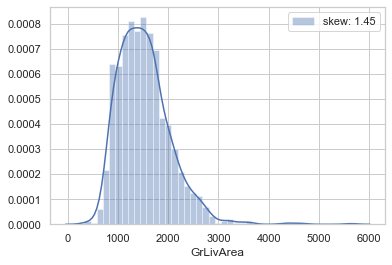

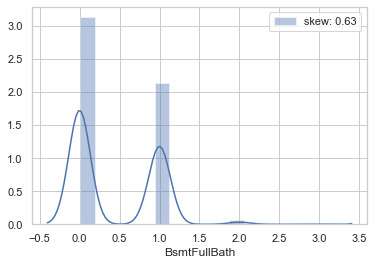

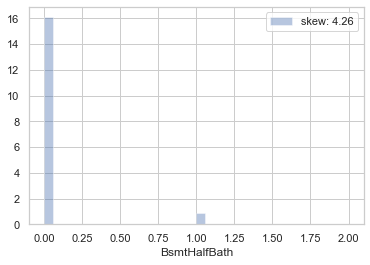

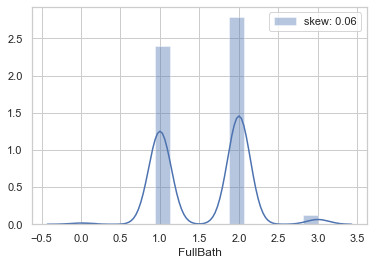

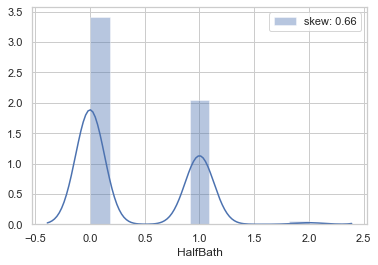

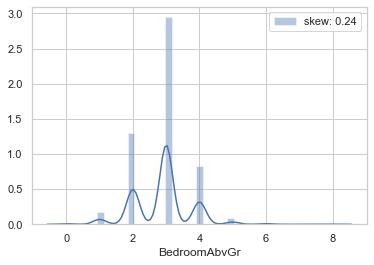

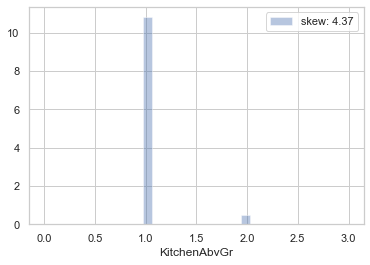

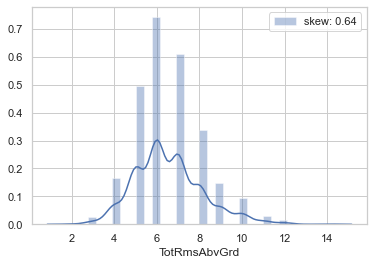

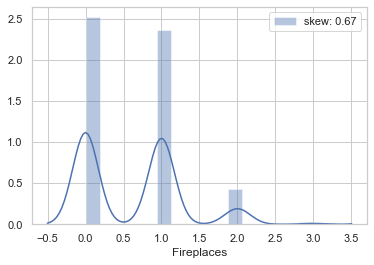

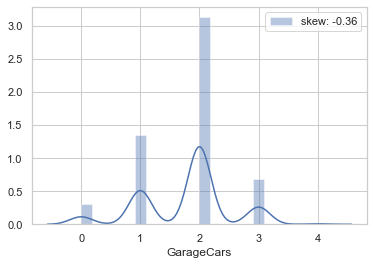

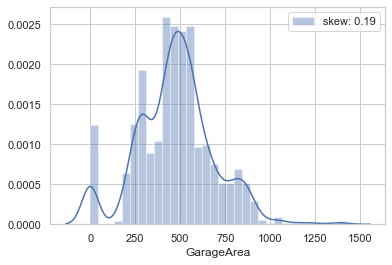

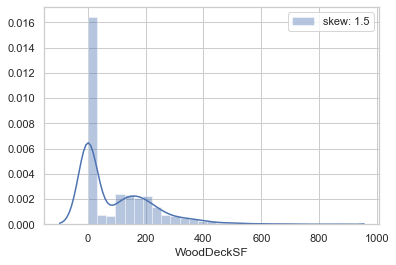

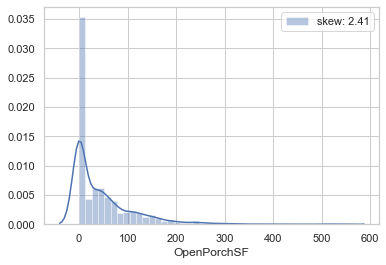

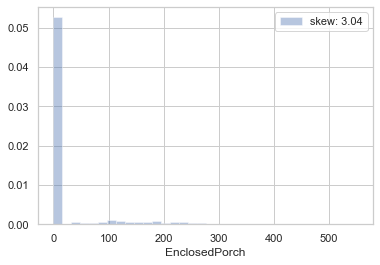

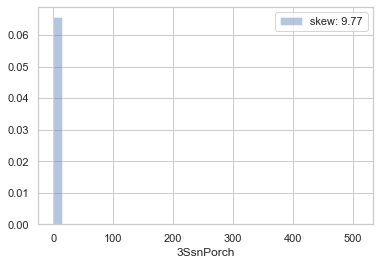

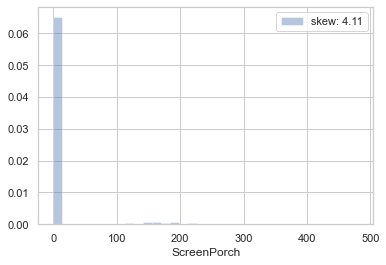

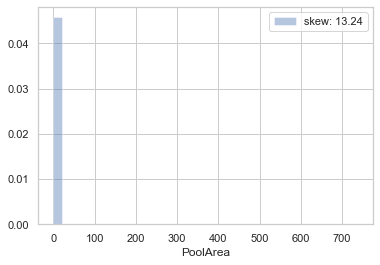

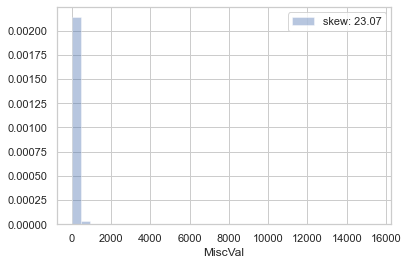

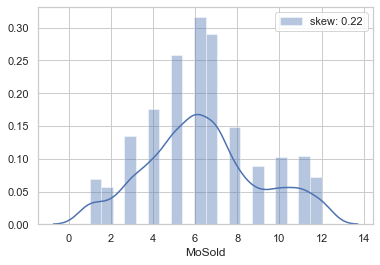

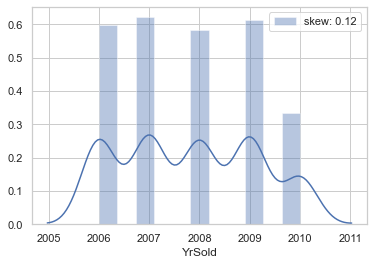

In [78]:
for col in features:
    plt.figure(figsize=(6,4))
    
    plt.subplot()
    sns.distplot(HP_train_copy[col], label="skew: " + str(np.round(HP_train_copy[col].skew(),2)))
    plt.legend()

###### MODEL - TRAINING

In [79]:
HP_train_x = HP_train_copy.drop(columns=['SalePrice'],axis=1)
y = HP_train_copy['SalePrice']

In [80]:
#Scaling input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(HP_train_x)
x=pd.DataFrame(x,columns=HP_train_x.columns)

In [81]:
#PCA 
from sklearn.decomposition import PCA
pca=PCA(n_components=90)
xpca=pca.fit_transform(x)
x=xpca

In [82]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.024203,-1.896836,0.132835,0.813668,-2.206555,-1.805352,1.034935,1.148676,0.749111,1.905750,...,-0.325685,-1.675760,0.981776,-0.007434,-0.614914,0.662097,0.510803,0.569616,-1.321954,0.706846
1,-2.247517,-4.218635,2.433669,2.467969,5.428217,2.217162,4.356637,-0.558530,-2.470528,0.699643,...,0.624664,-0.433794,-0.081001,-0.126274,-0.551848,0.030204,0.620165,2.363797,0.391270,-0.431841
2,-3.177177,-0.067145,0.034210,-0.530481,1.283673,-2.883606,1.486921,0.123392,0.735488,-1.436449,...,-0.406263,-0.565125,0.478300,0.830739,-0.762332,-0.106969,-0.540625,0.395964,-0.222289,0.101851
3,-2.108239,-3.530542,1.215853,2.012713,1.144982,0.329248,-3.079172,-0.169040,1.561101,0.786966,...,-0.983040,0.428533,-0.006171,0.382985,0.356060,-0.693143,-0.611637,-0.319174,0.088589,-0.390209
4,-3.131142,-1.375665,0.344652,1.783524,0.114749,-0.337493,-0.858986,1.613669,-0.122118,-1.224684,...,-1.009613,0.969119,1.308214,-0.684630,0.186485,0.144705,-0.747880,-0.469220,-1.034989,0.017221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3.795601,-2.918683,-1.471876,-0.272967,-2.503072,0.282076,-1.204942,-0.265730,0.679485,0.523214,...,-0.104531,-0.411484,-0.403443,-1.220855,-0.387782,-0.379170,-1.665722,0.777921,-0.600256,0.779911
1164,4.015035,2.373468,10.994015,-4.930745,-3.243131,0.556682,0.472173,-1.424523,-1.052938,-0.064363,...,0.194376,1.032288,1.056317,0.459191,-0.435559,0.254561,0.704745,-1.057799,-0.493409,0.406366
1165,0.639937,-1.219542,-0.937269,-1.445321,-1.285854,-5.676507,0.848077,3.376828,1.125398,2.766391,...,0.606616,-2.268821,0.794541,0.980317,-0.858492,0.744744,0.155646,1.306819,0.252613,-0.352539
1166,6.935111,2.136389,-2.251948,-2.369871,2.506222,1.338199,-0.219798,-0.662784,1.006307,-0.593304,...,-0.730759,-0.608365,1.862474,-0.548747,-1.552963,0.464859,0.380240,-0.515190,-1.595076,-0.049508


In [83]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [85]:
# Let's find the best random state

max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 98 is 0.8521998035857644


In [86]:
# Let's split the dataset into test and train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=98)

In [88]:
model=[LinearRegression(),
       DecisionTreeRegressor(),
       KNeighborsRegressor(),
       Lasso(),
       Ridge(),
       ElasticNet(),
       RandomForestRegressor(),
       AdaBoostRegressor(),
       GradientBoostingRegressor()
      ]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*************************************************************')
    print('\n')

score of LinearRegression() is: 0.8193724205930797
Error:
Mean absolute error: 21469.888017041507
Mean squared error: 946775046.8606462
Root Mean Squared Error: 30769.709892370553
r2_score: 0.8521998035857644
*************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 31141.619658119656
Mean squared error: 2355944553.0982904
Root Mean Squared Error: 48538.07323223997
r2_score: 0.632215626252951
*************************************************************


score of KNeighborsRegressor() is: 0.7922005613367162
Error:
Mean absolute error: 26561.786324786324
Mean squared error: 1692406532.774017
Root Mean Squared Error: 41138.868880585636
r2_score: 0.7357999465806027
*************************************************************


score of Lasso() is: 0.8193724100950655
Error:
Mean absolute error: 21467.05820809681
Mean squared error: 946624108.8469466
Root Mean Squared Error: 30767.257090077863
r2_score: 0.852223366

In [92]:
#HYPERPARAMETER TUNING
# Let's Use the GridSearchCV to find the best paarameters in Gradientboosting Regressor

parameters={'learning_rate': [1.0,0.5,0.25,0.1,0.05,0.01],
           'n_estimators': [1,2,4,8,16,32,64,100]
           }

gb=GradientBoostingRegressor()

reg=GridSearchCV(gb,parameters)
reg.fit(x,y)
print(reg.best_params_)

{'learning_rate': 0.25, 'n_estimators': 64}


In [93]:
# Let's use the GradientBoosting Regressor with its best parameters

GB = GradientBoostingRegressor(learning_rate=0.25,n_estimators = 64)
GB.fit(x_train,y_train)
print('Score:',GB.score(x_train,y_train))
y_pred=GB.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.9851173738029483


Mean absolute error: 18578.499045764143
Mean squared error: 649334285.8556473
Root Mean Squared error: 25482.038494901608


r2_score: 0.8986330118160709




In [94]:
# Let's Cross validate the Gradient Boosting model

score=cross_val_score(GB,x,y,cv=10,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.8065272  0.78450523 0.87018105 0.73238928 0.86319693 0.66213229
 0.83497087 0.79614971 0.83130163 0.84897934]
Mean Score: 0.8030333533010898
Standard deviation: 0.061077966115915455


In [95]:
# Let's save our best model

import joblib
joblib.dump(GB,'Housing_Prediction_Price_Project.pkl')

['Housing_Prediction_Price_Project.pkl']

###### TEST DATA SET

In [96]:
HP_test = pd.read_csv('test.csv')
HP_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [97]:
#filling missing values in categorical columns as NA
columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
HP_test[columns] = HP_test[columns].fillna('NA')

#filling missing values in MasVnrType with None
HP_test['MasVnrType'] = HP_test['MasVnrType'].fillna('None')

#filling missing values in GarageYrBlt with 0
HP_test['GarageYrBlt'] = HP_test['GarageYrBlt'].fillna('0')

#Imputing the missing values with their median

HP_test['LotFrontage'].fillna(HP_test['LotFrontage'].median(),inplace=True)
HP_test['MasVnrArea'].fillna(HP_test['MasVnrArea'].median(),inplace=True)

In [98]:
#Encoding categorical columns
categorical_colss = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

HP_test = pd.get_dummies(HP_test, columns = categorical_colss, drop_first=True)

In [99]:
#Droppiing the uunneccasary columns
HP_test.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

In [100]:
HP_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,86.0,14157,9,5,2005,2006,200.0,1249,0,...,0,1,0,0,0,0,1,0,1,0
1,120,65.0,5814,8,5,1984,1984,0.0,1036,0,...,0,1,0,0,0,0,0,0,0,0
2,20,65.0,11838,8,5,2001,2001,0.0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,70,75.0,12000,7,7,1941,1950,0.0,275,0,...,0,1,0,0,0,0,1,0,1,0
4,60,86.0,14598,6,5,2007,2007,74.0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,78.0,10206,8,5,2007,2007,468.0,33,0,...,0,1,0,0,0,0,1,0,1,0
288,20,57.0,9245,5,5,1994,1995,0.0,686,0,...,0,1,0,0,0,0,1,0,1,0
289,20,65.0,11241,6,7,1970,1970,180.0,578,0,...,0,1,0,0,0,0,1,0,1,0
290,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,0,1,0,0,0,0,1,0,1,0


In [101]:
HP_copy=HP_test.copy()

In [102]:
def percentile_capping(HP_test, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=HP_test[col], limits=(from_low_end, from_high_end), inplace=True)

In [103]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [104]:
percentile_capping(HP_copy, features, 0.01, 0.10)
HP_copy.shape

(292, 213)

In [105]:
# Let's Scale the input variables

sc=StandardScaler()
x1=sc.fit_transform(HP_test)
x1=pd.DataFrame(x1,columns=HP_test.columns)

In [106]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x1)
x1=xpca

In [107]:
# Let;s load our save model

model=joblib.load('Housing_Prediction_Price_Project.pkl')

In [108]:
# Let's Test our save model

import sys
nums= model.predict(x1)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[275326.3480049  204142.83054527 211650.13658416 143367.60593245
 266748.91096908 102223.37998306 137882.88688557 412429.75217932
 217674.58313177 169949.50090085  99073.05497099 128349.54346108
 145604.99432828 217491.44320074 347323.18769296 132290.82052981
 109428.03558898 124855.31324351 192889.36830882 238757.1710977
 126606.51692871 187602.13680707 166165.04086786 101465.66217055
  94397.05487172 143424.65455879 241023.35876796 146840.68043483
 235541.37651728  97958.7231182  148689.19256621 176395.6973698
 209579.41758161 176498.00656191  97099.22049422 235032.64980581
 264763.70290427 121018.24553383 198787.01914269 165055.33576289
 112874.32628268 319378.51958663 266768.77318176 184625.59229332
 150766.71420554 113445.58186789 136663.10410972  82387.81725582
 231086.15274022 235382.19364588 140975.34443719 187825.56190107
 119944.74695719 125431.03435769 348384.61311799 128715.56001004
 131052.00347813 244615.08321461 129945.41112622 295612.66240662
 129352.0901818  216127.369